## What is the most optimal skill to learn for Data Analyst?

##### Methodology

1. Continue from last notebook to find percent of psotings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certian technologies are more prevalent

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Clean Data

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop NaN values from the `salary_year_avg` column. Then it uses the `explode` method on the `job_skills` column to create a new row in a new DataFrame (`df_DA_US_exploded`) for each skill associated with a job. Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the result in descending order by count. It then renames the columns. Calculates the percentage that each skill count represent out of the total number of Data Analyst jobs. Finally, filter out any skill that don't have any jobs associated with them.

In [7]:
# using df_DA find the count of skills and also the median salarry for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by = 'count', ascending = False)

df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.0,2508,57.655172
excel,84392.0,1808,41.563218
python,97500.0,1431,32.896552
tableau,92875.0,1364,31.356322
sas,90000.0,926,21.287356
...,...,...,...
theano,100000.0,1,0.022989
typescript,65000.0,1,0.022989
vmware,147500.0,1,0.022989


### Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage(`skill_limit`).


In [8]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median slaary for those skills.

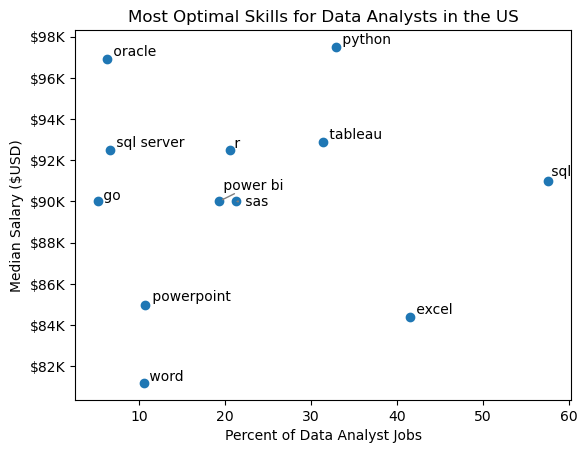

In [9]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Coloring by Technology

Add of color labels based on technology. Removing duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. the final result is a dictionary where each key represent a skill and each value is a list of unique attributes associated with that skill.

In [10]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in techonology_dict, add vlaue to existing value
            technology_dict[key] += value
        else:                      # if key doesn't exist in technology_dict, add key and value
            technology_dict[key] = value
        
# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'nuix',
  'esquisse',
  'powerpoint',
  'excel',
  'visio',
  'microstrategy',
  'spss',
  'sas',
  'cognos',
  'tableau',
  'powerbi',
  'ms access',
  'sharepoint',
  'dax',
  'splunk',
  'power bi',
  'looker',
  'alteryx',
  'datarobot',
  'sap',
  'word',
  'ssis',
  'sheets',
  'spreadsheet',
  'qlik',
  'ssrs',
  'outlook'],
 'programming': ['mongodb',
  'rust',
  'python',
  'php',
  'mongo',
  'bash',
  'f#',
  'erlang',
  'dart',
  'elixir',
  'cobol',
  'sas',
  'objective-c',
  'c++',
  'c',
  'shell',
  'pascal',
  'java',
  'lisp',
  'kotlin',
  'fortran',
  'solidity',
  'crystal',
  'delphi',
  'javascript',
  'visual basic',
  'sql',
  'assembly',
  'powershell',
  'typescript',
  'sass',
  'no-sql',
  'html',
  'css',
  'swift',
  'ocaml',
  't-sql',
  'scala',
  'golang',
  'vb.net',
  'nosql',
  'matlab',
  'go',
  'vba',
  'c#',
  'r',
  'groovy',
  'julia',
  'ruby',
  'perl',
  'clojure',
  'visualbasic',
  'lua',
  'apl',
  'hask

This code converts a dictionary into a pandas DataFrame, then expoldes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [12]:
# turn dictionary into DataFrame

df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,msaccess
0,analyst_tools,nuix
0,analyst_tools,esquisse
0,analyst_tools,powerpoint
0,analyst_tools,excel
...,...,...
9,sync,slack
9,sync,mattermost
9,sync,symphony
9,sync,webex


Merges two DataFrames, `df_DA_skills` and `df_technology`, based on the columns `job_skills` and `skills` respectively, creating a new DataFrame `df_DA_skills_tech`.

In [13]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on = 'job_skills', right_on = 'skills')

df_DA_skills_tech

,median_salary,skill_count,skill_percent,technology,skills
0,91000.0,2508,57.655172,programming,sql
1,84392.0,1808,41.563218,analyst_tools,excel
2,97500.0,1431,32.896552,programming,python
3,92875.0,1364,31.356322,analyst_tools,tableau
4,90000.0,926,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,100000.0,1,0.022989,libraries,theano
170,65000.0,1,0.022989,programming,typescript
171,147500.0,1,0.022989,cloud,vmware
172,65000.0,1,0.022989,webframeworks,vue


Filters `df_DA_skills_tech` to select rows where the 'percent' column exceeds a specified threshold, storing the result in `df_DA_skills_tech_high_demand`.

In [14]:
df_DA_skills_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

Plot the results in a scatter plot, coloring the points based on the 'technology' column.

4 [0.72728254 0.92071152]
5 [-0.87749274 -0.93927748]


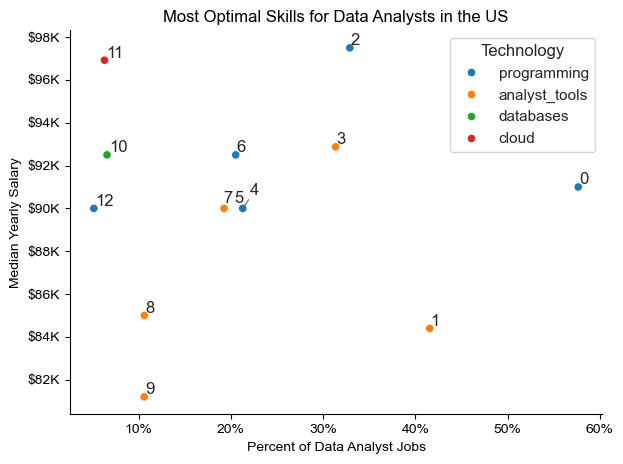

In [16]:
sns.scatterplot(
    data = df_DA_skills_high_demand,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology'
)

sns.despine()
sns.set_theme(style = 'ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
